In [1]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    token=''
)


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_aer import Aer

{'00': 256, '11': 256}


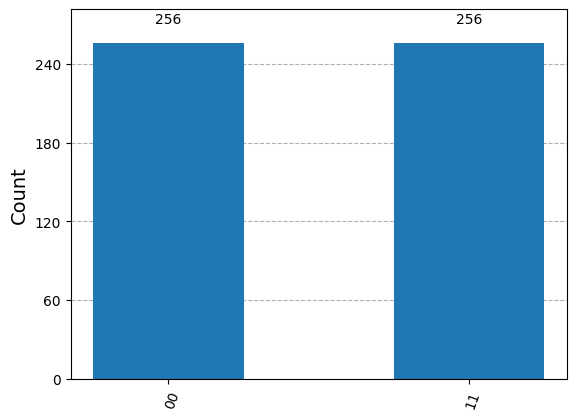

In [12]:
# 앞 부분
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.barrier(range(2))

# 뒷 부분
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
meas.measure(range(2), range(2))
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend), shots=512)
result = job.result()
counts = result.get_counts(qc)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

{'00 00': 263, '11 00': 249}


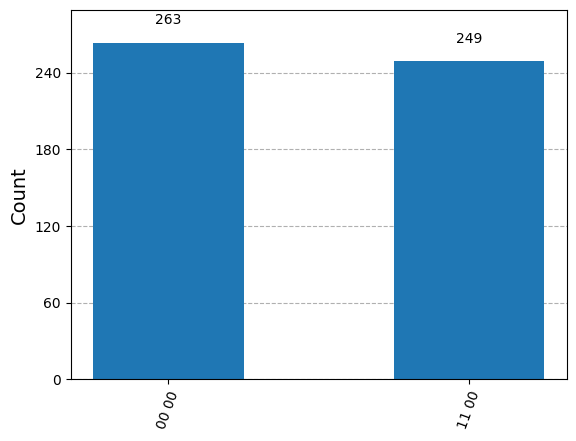

In [14]:
# 앞 부분과 뒷 부분 한 번에 쓰기
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.barrier()
circ.measure_all() # 측정
circ.draw('mpl')

backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(circ, backend), shots=512)
result = job.result()
counts = result.get_counts(circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)